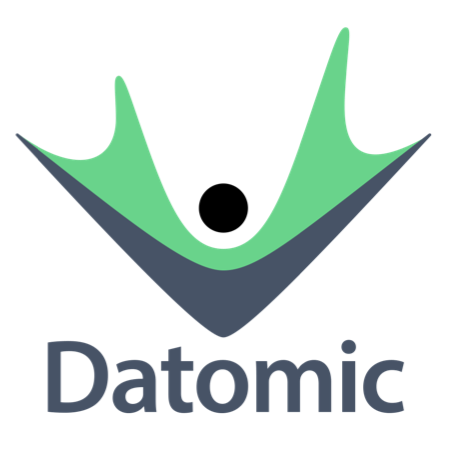

# O que é Datomic?
* Um banco de dados de propósito geral;
* Imutável;
* ACID;
* Leituras escaláveis;
* Temporal;
* Pronto para a nuvem;
* **Muito Legal**.

O Datomic pode ser utizado de 3 formas:
* Datomic Pro;
* Datomic Cloud;
* Datomic Local.

**Todas gratuitas!** 

Você pode encontrar as instruções de uso na [documentação](https://docs.datomic.com/setup/setup.html).

Nessa aula nós iremos utilizar o **datomic pro** versão 1.0.7394.

[Documentação](https://docs.datomic.com/reference/filters.html)

# Um pouco sobre arquitetura

**Datomic** é um banco de dados distribuido, isso significa que diferentes ações são realizadas por diferentes componentes!

### Transactor
<img width="33%" src=attachment:2032bab3-66d6-484d-9ba4-b10f21871719.png>

Como o nome diz, um `transactor` é responsável por: executar transações; manter índices; e escrever dados no armazenamento.
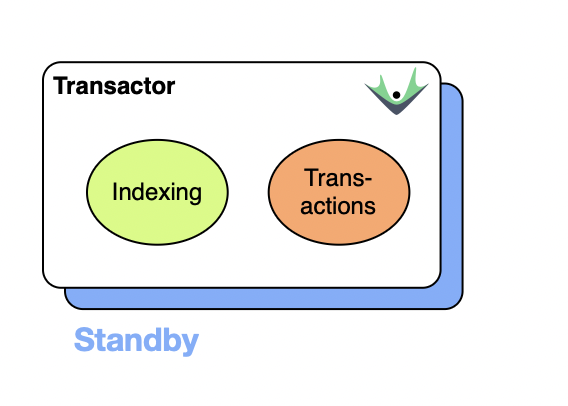

### Peer

<img width="33%" src=attachment:60d13d36-4794-49de-8cb3-e14c3aeac0e8.png>

`Peer`s são grandes clientes, eles incorporam uma biblioteca da **JVM**[1] que submete transações para os `transactors`; executam consultas; e fazem cache dos resultados;

##### [1] Lembre-se que Clojure roda na JVM.
##### Fun Fact: `peer` significa *colega*
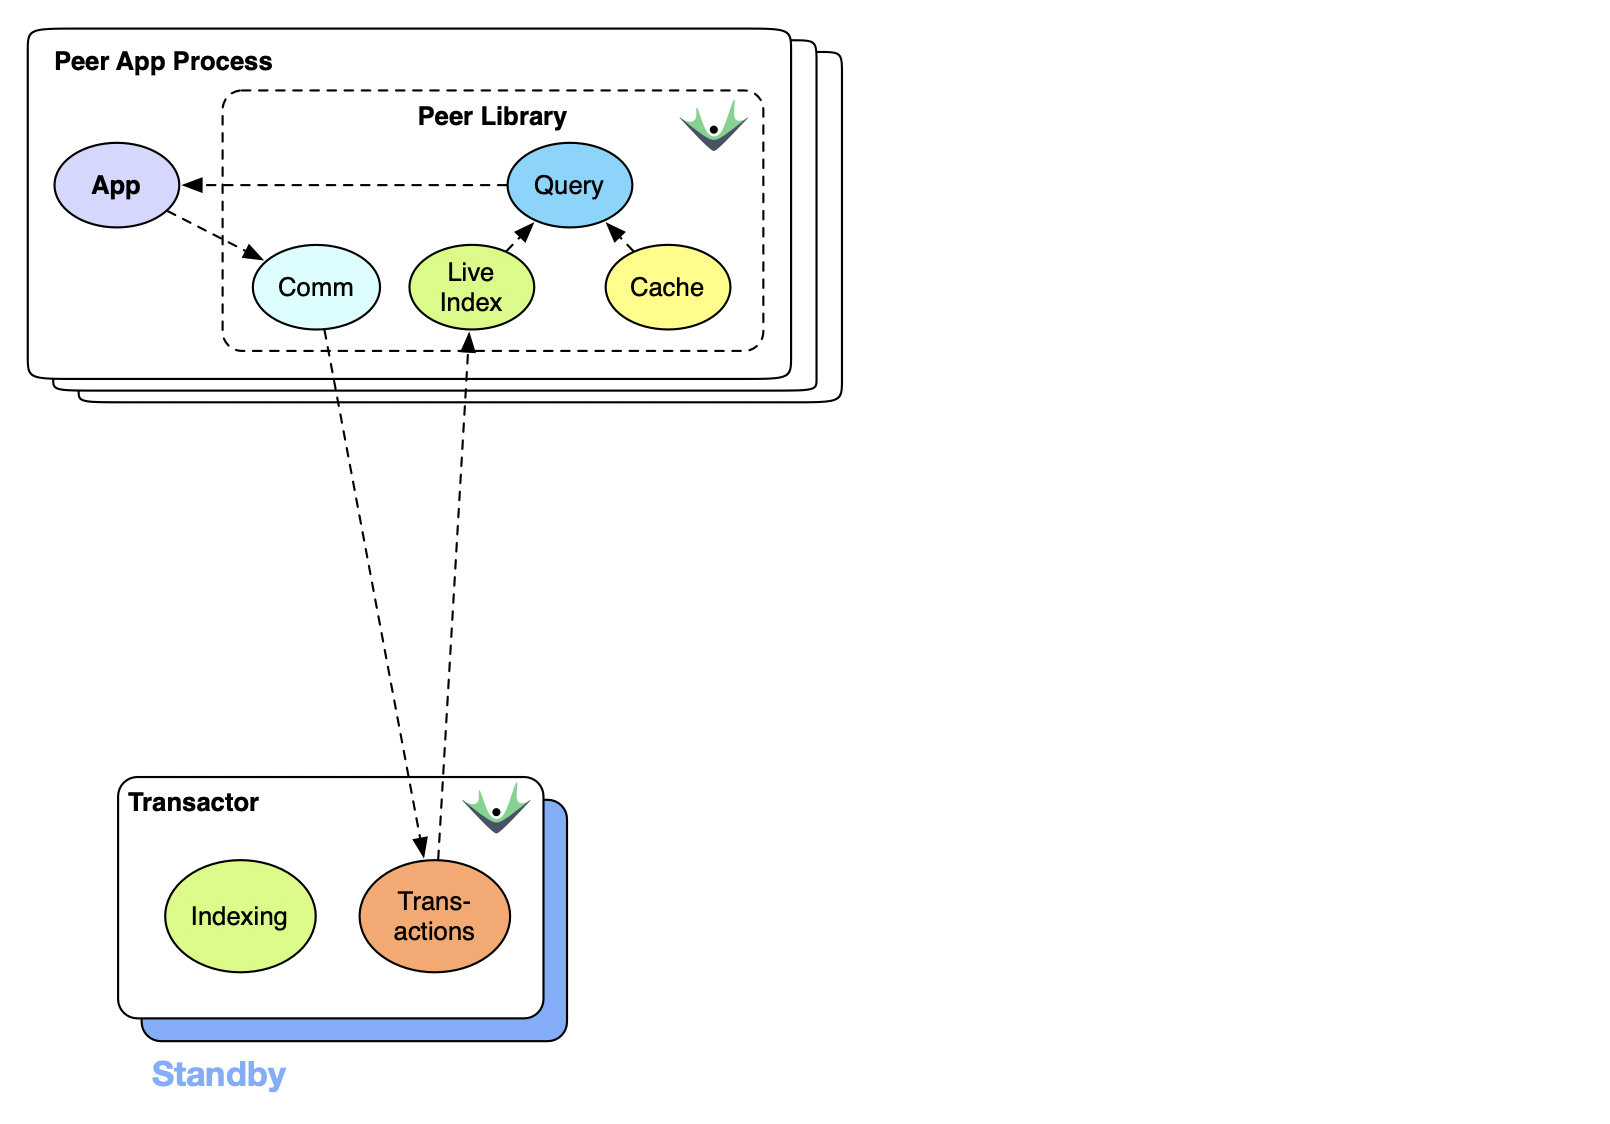

### Representação geral da arquitetura:

<img width="33%" src=attachment:d730f675-a1aa-402a-b729-27119303d0ee.png>
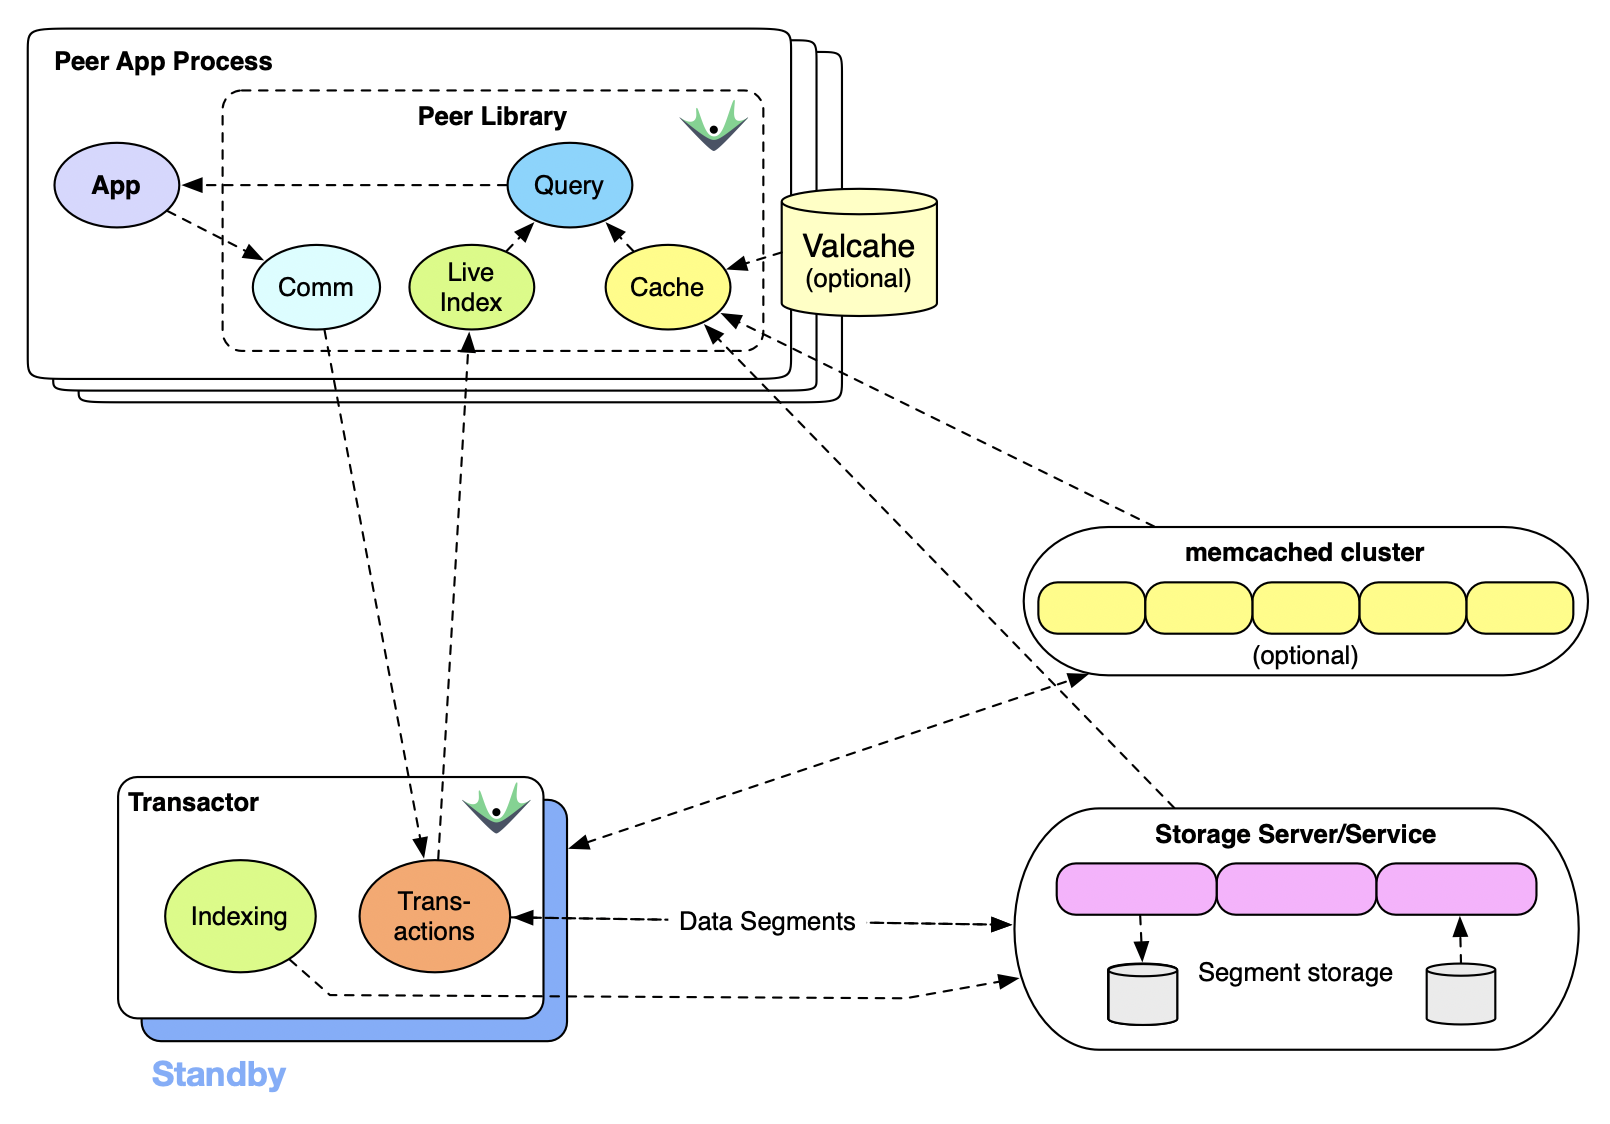

# Modelo de informação

Parte da peculiaridade do Datomic se encontra em seu modelo de informação, em qualquer instante no tempo o estado do banco de dados é representado por um conjunto `[entidade, atributo, valor, transação, op?]`, quíntuplas (`EAVTOp`)[2], conhecidos como `datoms`.

##### [2] Geralmente só nos referimos a quádruplas `EAVT`.

Entidades são deduzidass através de um `e` comum:

<img width="50%" src=attachment:22d1ebca-425b-4316-94bb-b9a034cddb9d.png>

[Documentação](https://docs.datomic.com/datomic-overview.html?search=Datom#information-model)
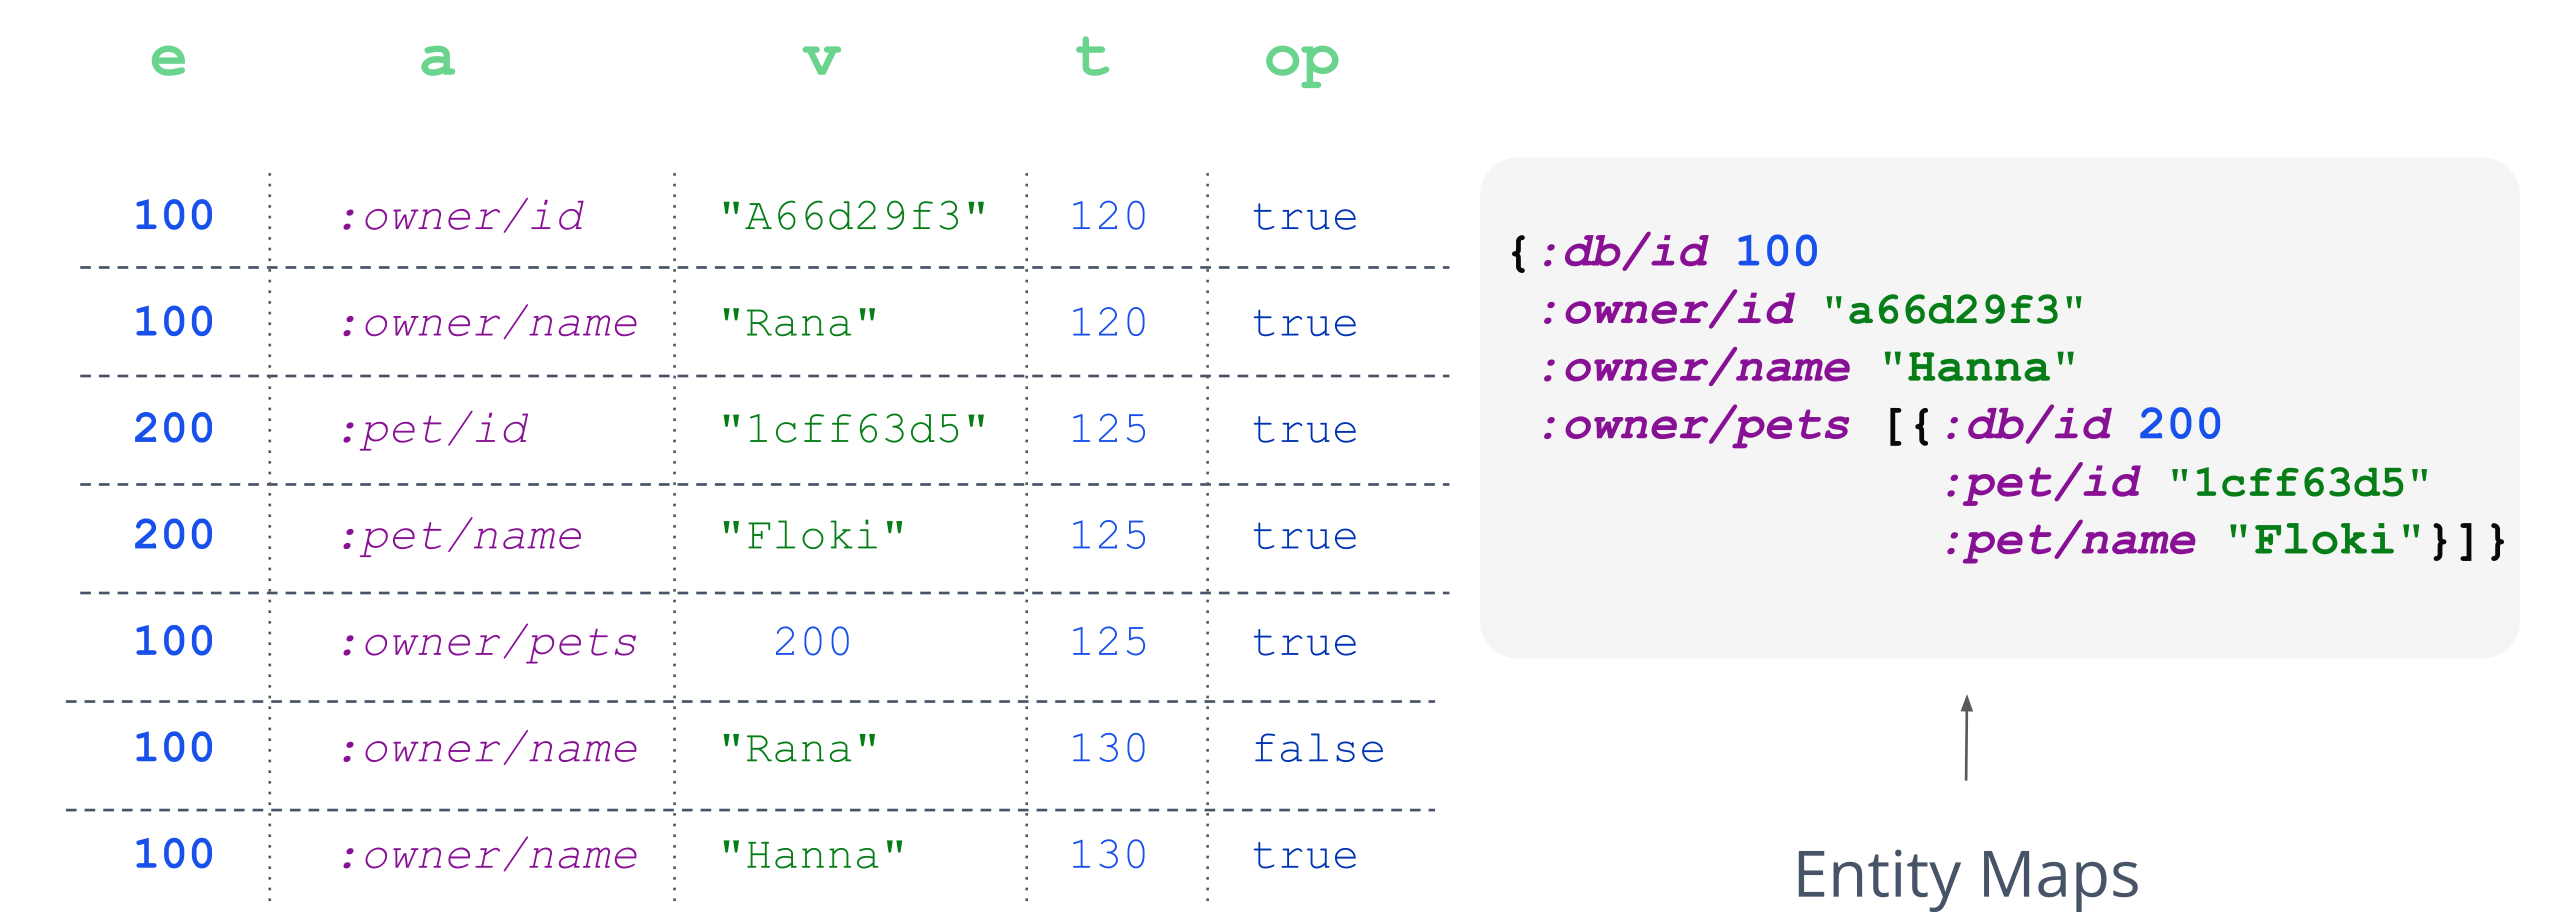

### Tal como LISPs tudo é **dado**, incluindo os schemas:

<img width="50%" src=attachment:d8012f2f-40b3-41bf-b37f-762c9484afb9.png>
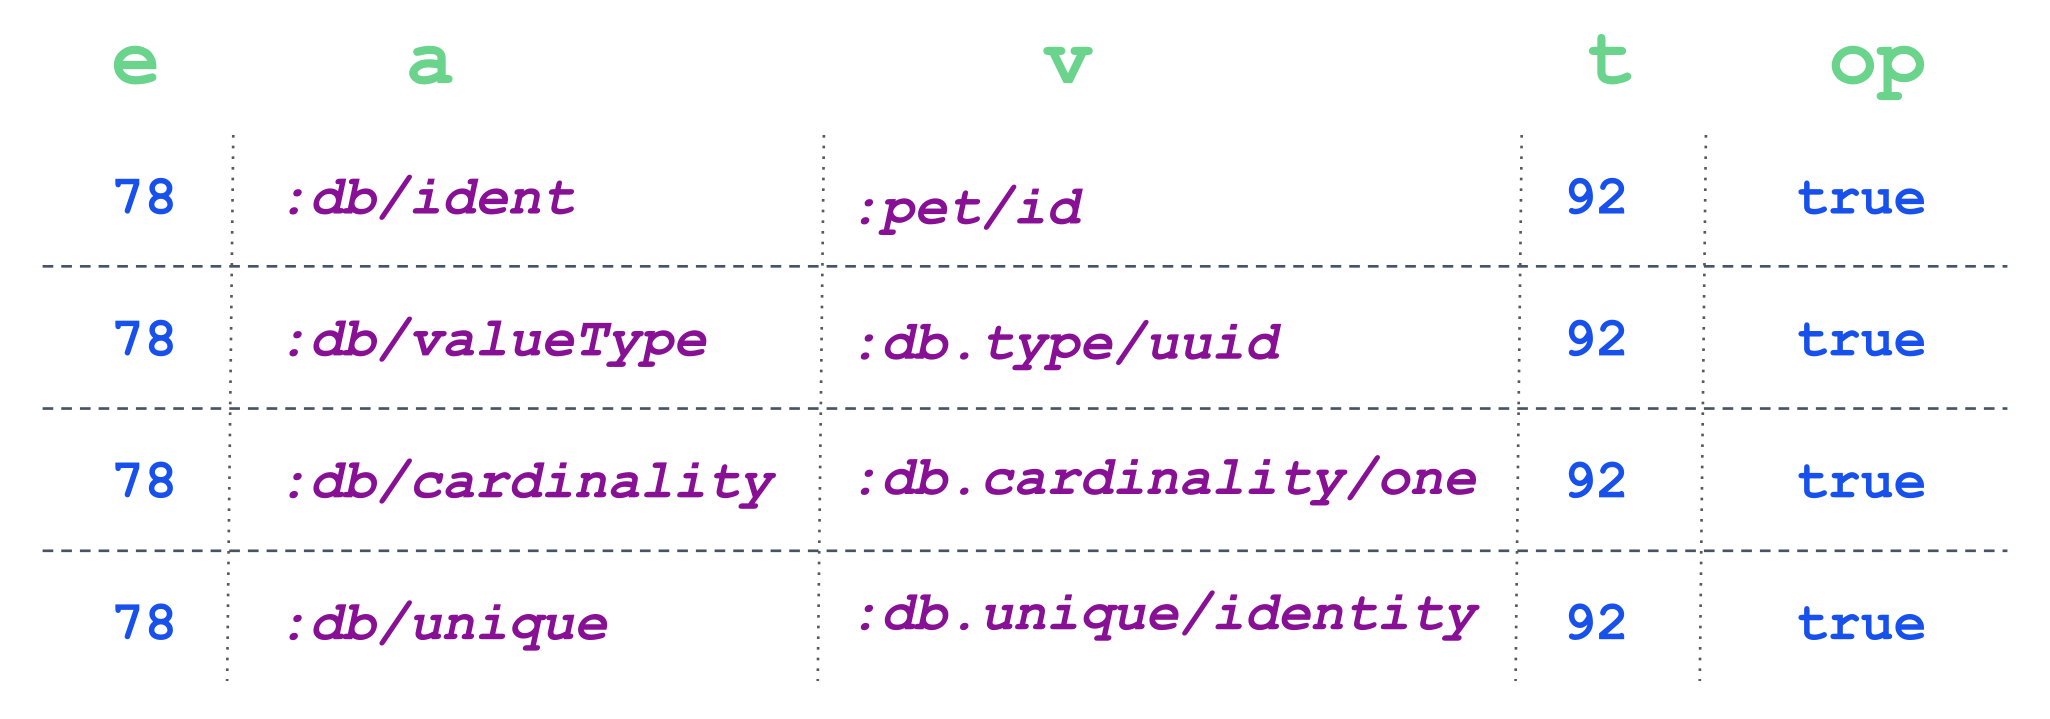

### Questão

Considerando que os `schemas` são dados, como você imagina que eles são adicionados ao armazenameto?

Um `schema` é definido como uma lista de mapas:

In [ ]:
(def schema [{:db/ident       :owner/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/identity
              :db/doc         "Identificador único"}
             {:db/ident       :owner/name
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             {:db/ident       :owner/pets
              :db/valueType   :db.type/ref
              :db/cardinality :db.cardinality/many}])

Perceba que acima só associamos o símbolo `schema` a um valor que define um `schema`.

É apenas código **Clojure**, nada foi de fato feito no banco de dados.

[Documentação](https://docs.datomic.com/schema/schema-reference.html)

# Modelo Temporal
Datomic é um banco de dados temporal, mas o que isso significa?

Isso significa que o Datomic modela o tempo de forma **explicita** onde toda transação é identificada por um **marcador de tempo** (timestamp).

Mais especificamente um **marcador de tempo lógico estritamente monotônico** `t`, tal como um "tempo de relógio" `txInstant`.

Em resumo toda transação também armazena um dado indicando *quando* ela ocorreu, nesse caso o `T` de `EAVT`!

Além disso, `op?` indica se determinado dado está "adicionado" (`assert`) ou foi "recolhido" (`retracted`) em um determinado estado do do banco de dados.

<p>
    <img width="25%" src=attachment:36935ad4-a00d-43e3-b507-904892b3fb78.png>
    <img width="25%" src=attachment:ad980d85-8662-4d59-9598-7cfe2e63761f.png>
</p>

Tudo que não está com `op` igual a `false` está disponível em nosso processo, ou seja, será retornado por padrão em consultas. 

[Documentação](https://docs.datomic.com/reference/filters.html)
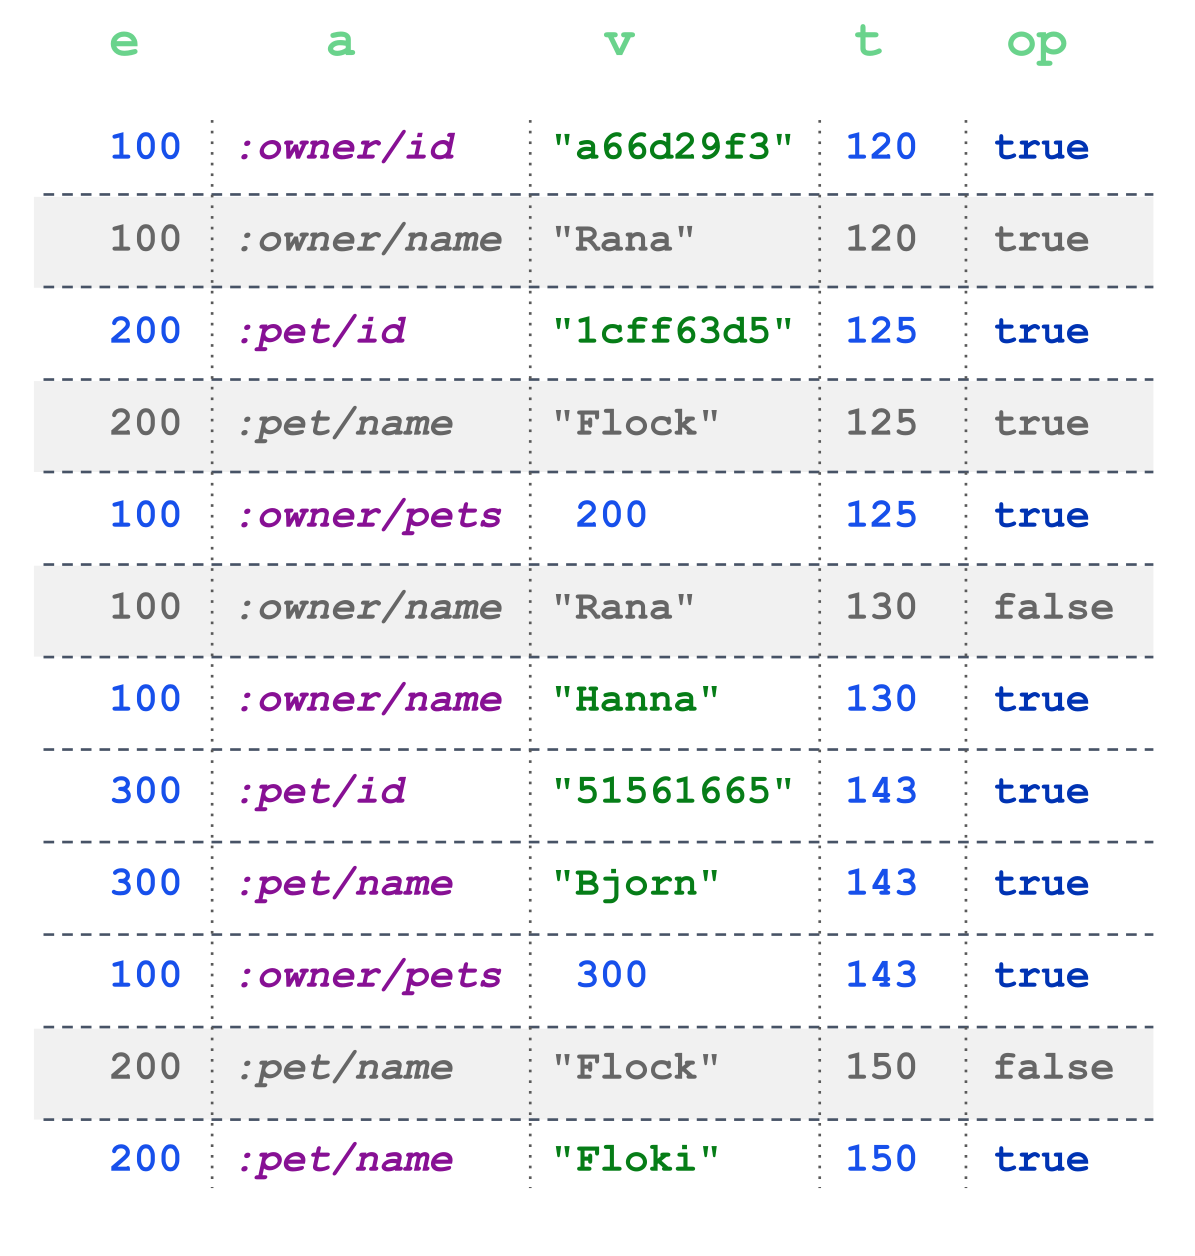
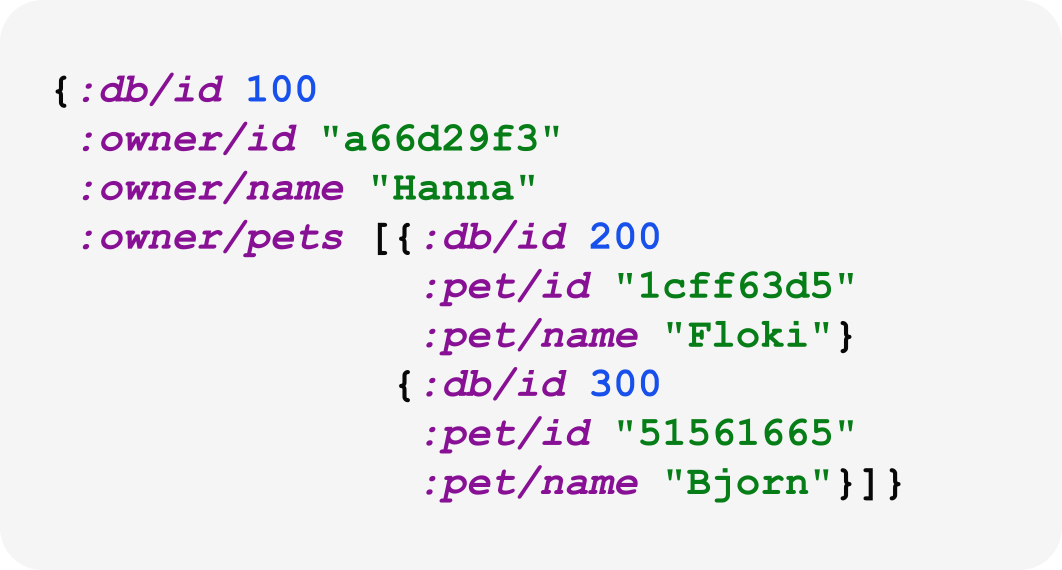

### Algumas funções para filtrar `tempo`

* `as-of`: Retorna o estado do banco de dados até um determinado `t`, `data` ou `id de transação`;
<p>
    <img width="25%" src=attachment:355d2baa-4c77-4371-82a2-cf3bfb790eb1.png>
    <img width="25%" src=attachment:e2eb0172-e70e-43d6-8185-9953ff403668.png>
</p> 

[Documentação](https://docs.datomic.com/reference/filters.html#as-of)
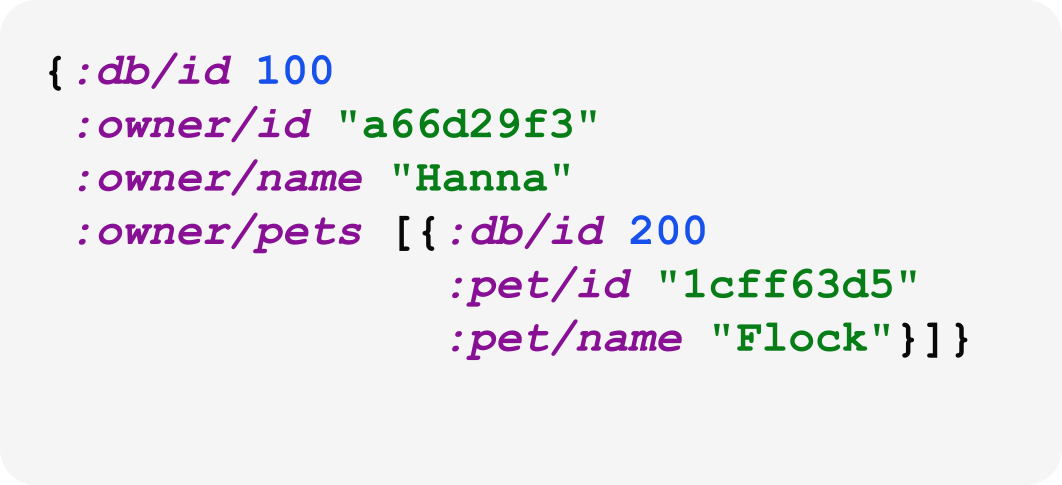
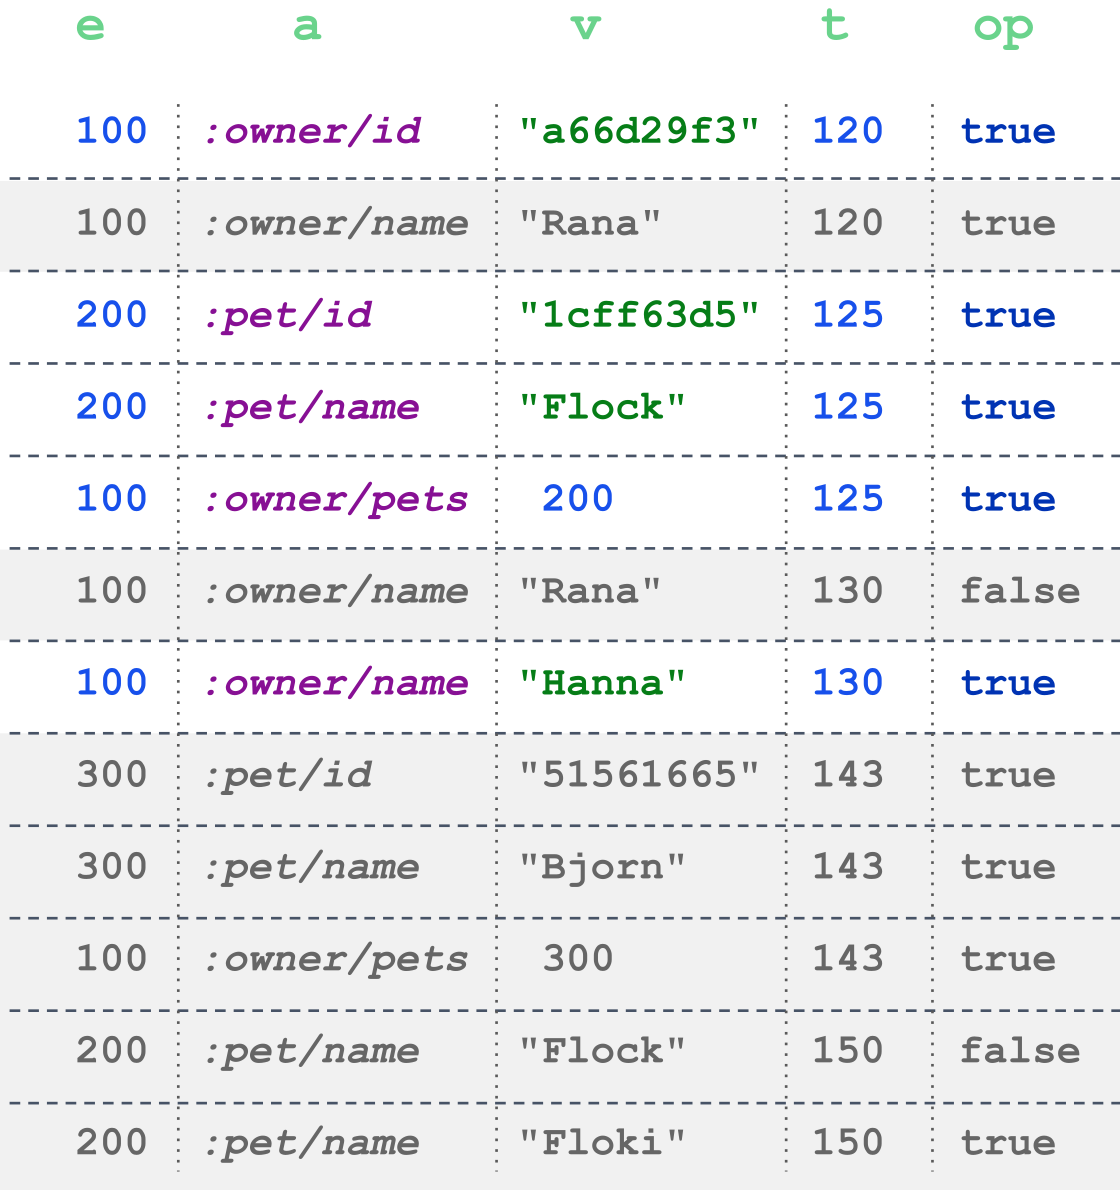

### Questão:
No exemplo acima, `as-of` foi executado com que dado?

* `since`: Retorna o estado do banco de dados desde um determinado `t`, `data` ou `id de transação` de forma **exclusiva**;

<p>
    <img width="25%" src=attachment:1c66bbc9-2f78-49f8-8f1c-9ddfd7993c2e.png>
    <img width="25%" src=attachment:57c685ee-4297-45ca-b3d6-b6b9cd669222.png>
</p>

[Documentação](https://docs.datomic.com/reference/filters.html#since)
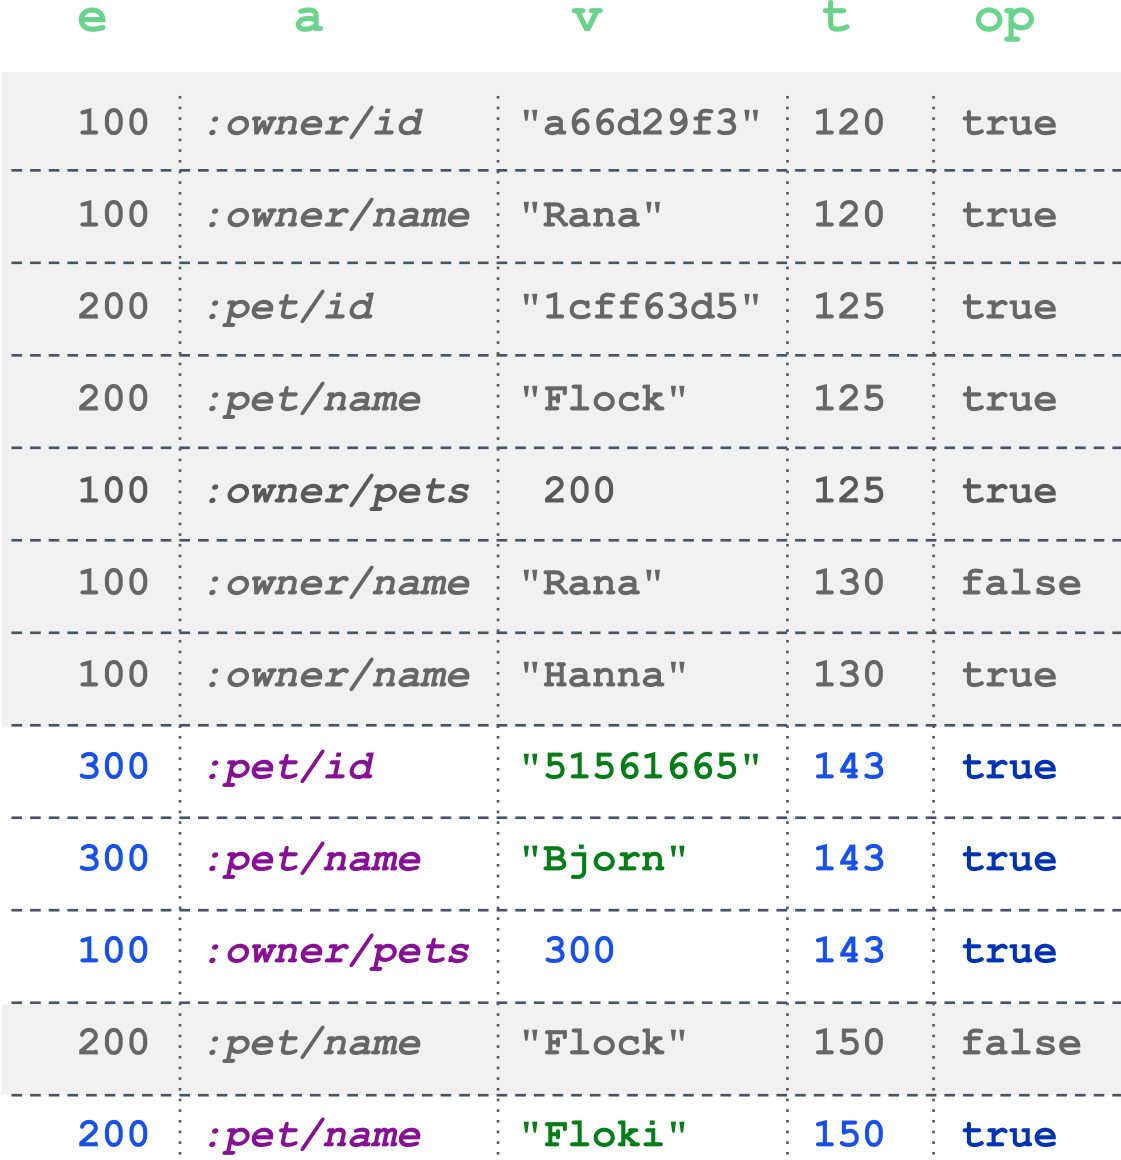
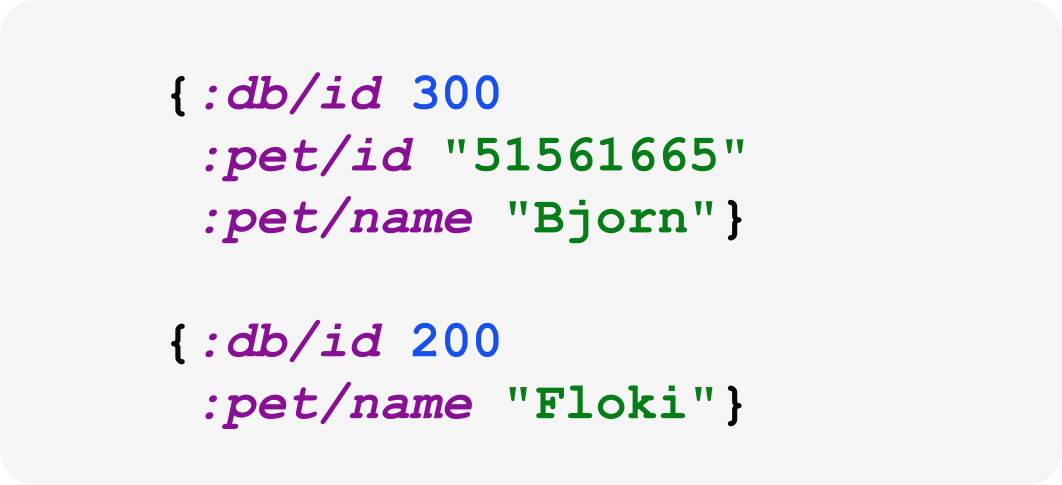

### Questão:
No exemplo acima, `since` foi executado com que dado?

* `history`: Retorna tudo o que já ocorreu no banco de dados;

<img width="25%" src=attachment:2616ad92-d7c6-4f5b-86ba-7dd19345c6bc.png>

[Documentação](https://docs.datomic.com/reference/filters.html#history)
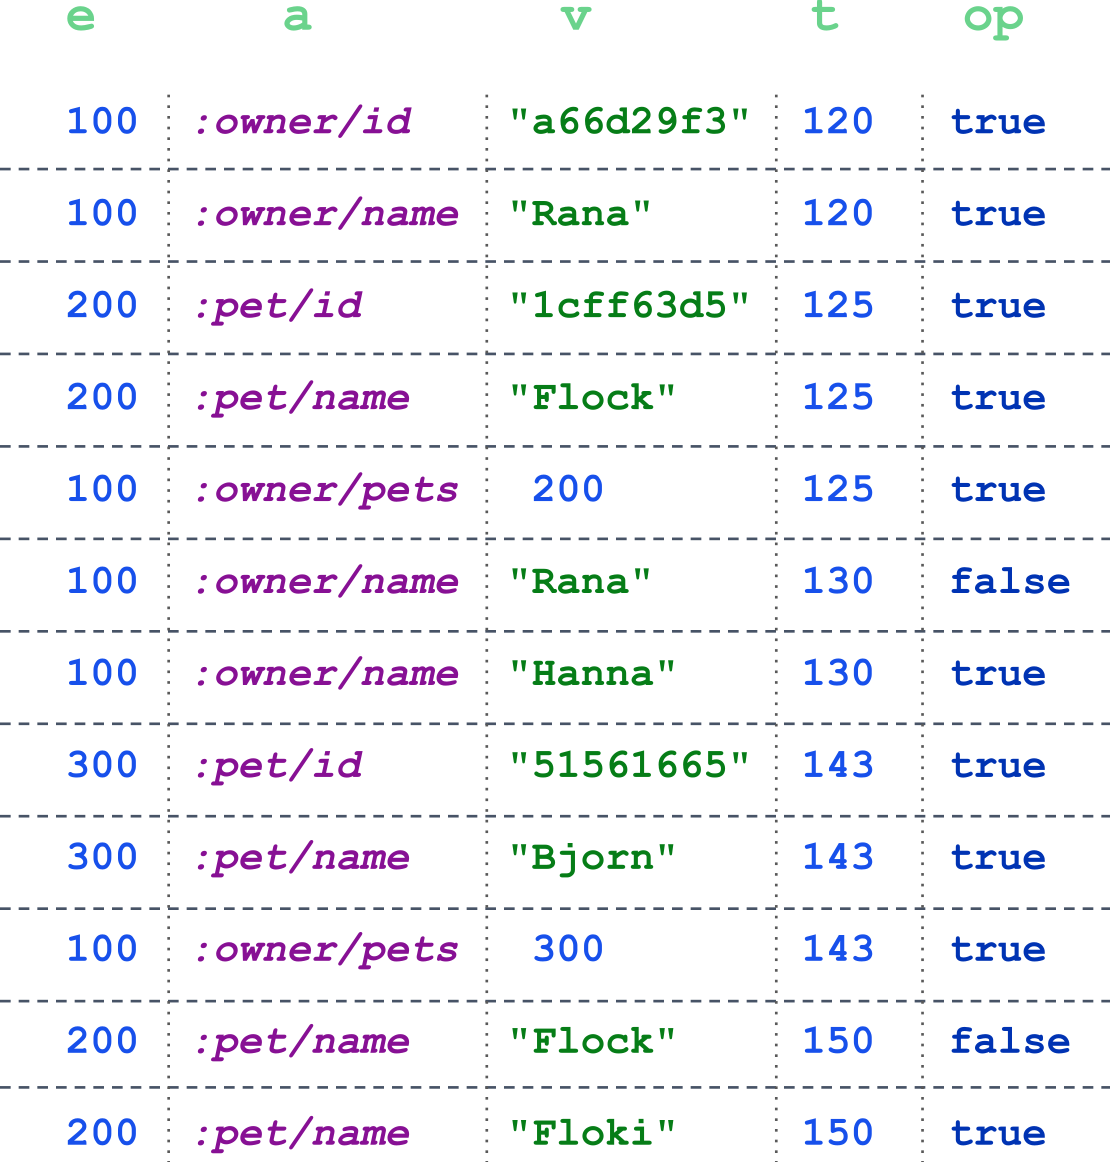

* `with`: Simula uma transação.

<p>
    <img width="25%" src=attachment:7b6b3718-2c6a-4577-a86b-d3c2d01a4e53.png>
    <img width="25%" src=attachment:072a6b58-4add-4e3d-8e6f-434b03eab8f0.png>
</p> 

[Documentação](https://docs.datomic.com/transactions/model.html#with-and-transact)
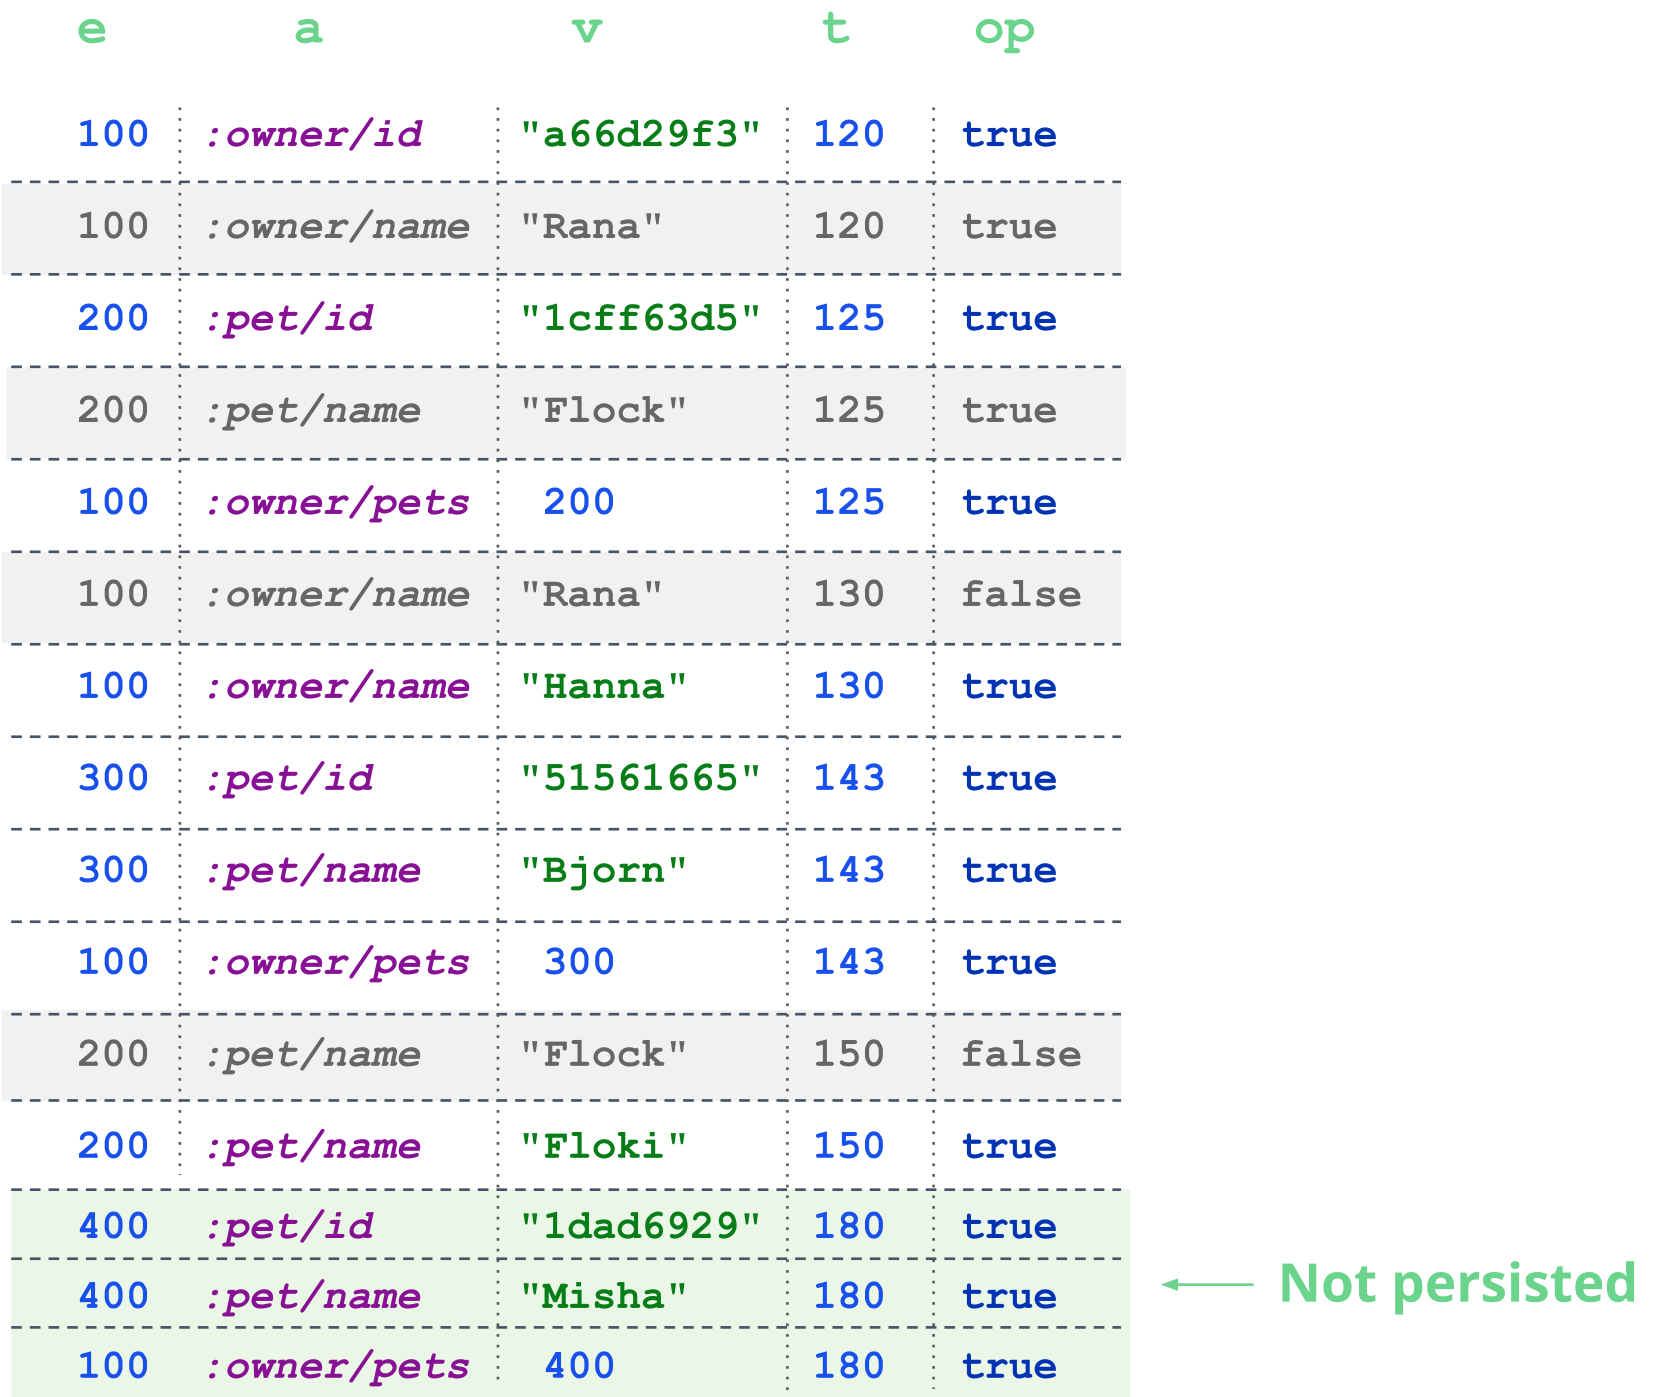
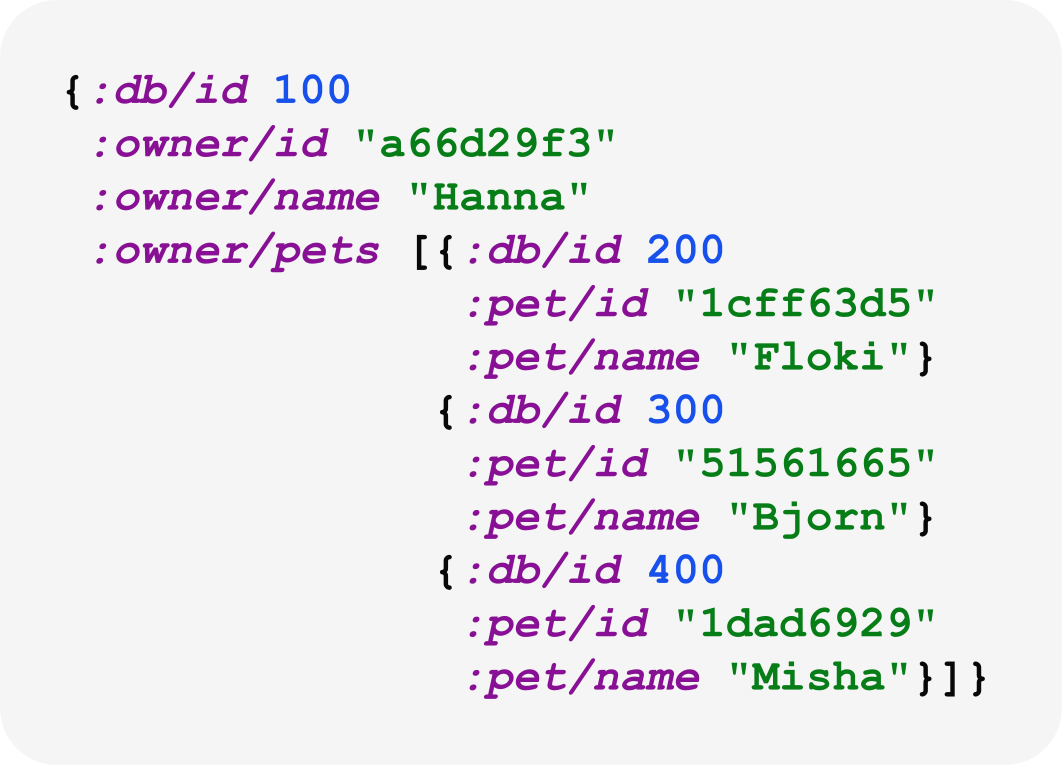

# Primeiros passos

No binder, abra uma nova aba e selecione o terminal.

No terminal digite:

```bash
cd
cd datomic/datomic-pro-1.0.7394/
bin/transactor config/samples/dev-transactor-template.properties 
```
E espere o sistema devolver:
```
System started
```

Você acabou de lançar um `transactor`!

Agora rode o bloco a seguir, ele será responsável por importar a `peer api`  do `datomic` junto com o `pretty printer` (`clojure.pprint`):

In [ ]:
(require '[clojupyter.misc.helper :as helper]
         '[clojure.pprint :as pp])

(helper/add-dependencies '[com.datomic/peer "1.0.7394"])

(require '[datomic.api :as d])

Agora vocês já possuem o que é necessário para realizar os exercícios desta aula.

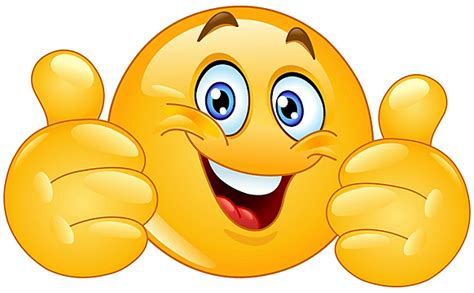

# Vamos colocar um pouco em prática:

##### Instruções:
* Comentários com **TODO** significam que algo precisa ser completado;
* Chaves ou símbolos `change-me` devem ser alterados para algo que faça sentido.

Qualquer dúvida é só perguntar!

##### Lembre-se de estar com o transactor rodando!

Primeiramente vamos definir uma rota para nosso banco de dados:

In [ ]:
(def db-uri "datomic:dev://localhost:4334/pet-shop")

Agora vamos criar o banco de dados:

In [ ]:
(d/create-database db-uri)